### Import Libraries and Load in Dataset

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from itertools import combinations
%matplotlib inline


In [24]:
dataset = pd.read_csv('D:\lianz\Desktop\Python\data_science_discovery\winequality\winequality\winequality-red.csv',sep=';')
interested_cols = list(dataset.columns.drop("quality"))
interested_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

#### Check correlation between features (columns)

In [25]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

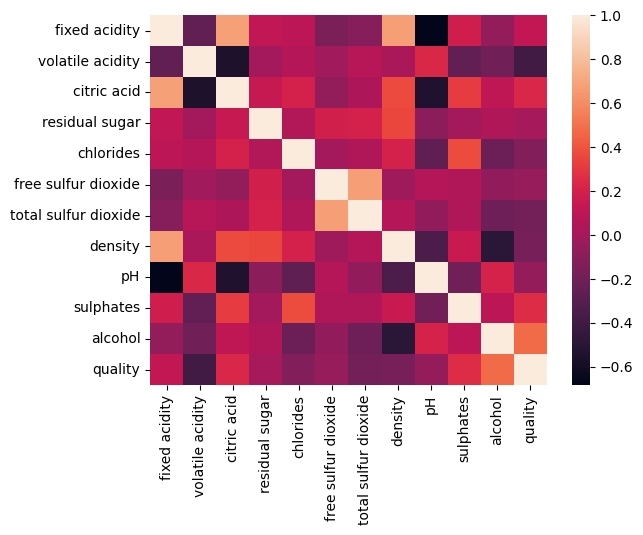

In [26]:
# plot the heatmap
sns.heatmap(dataset.corr())

#### Scatterplot - Numpy test fit

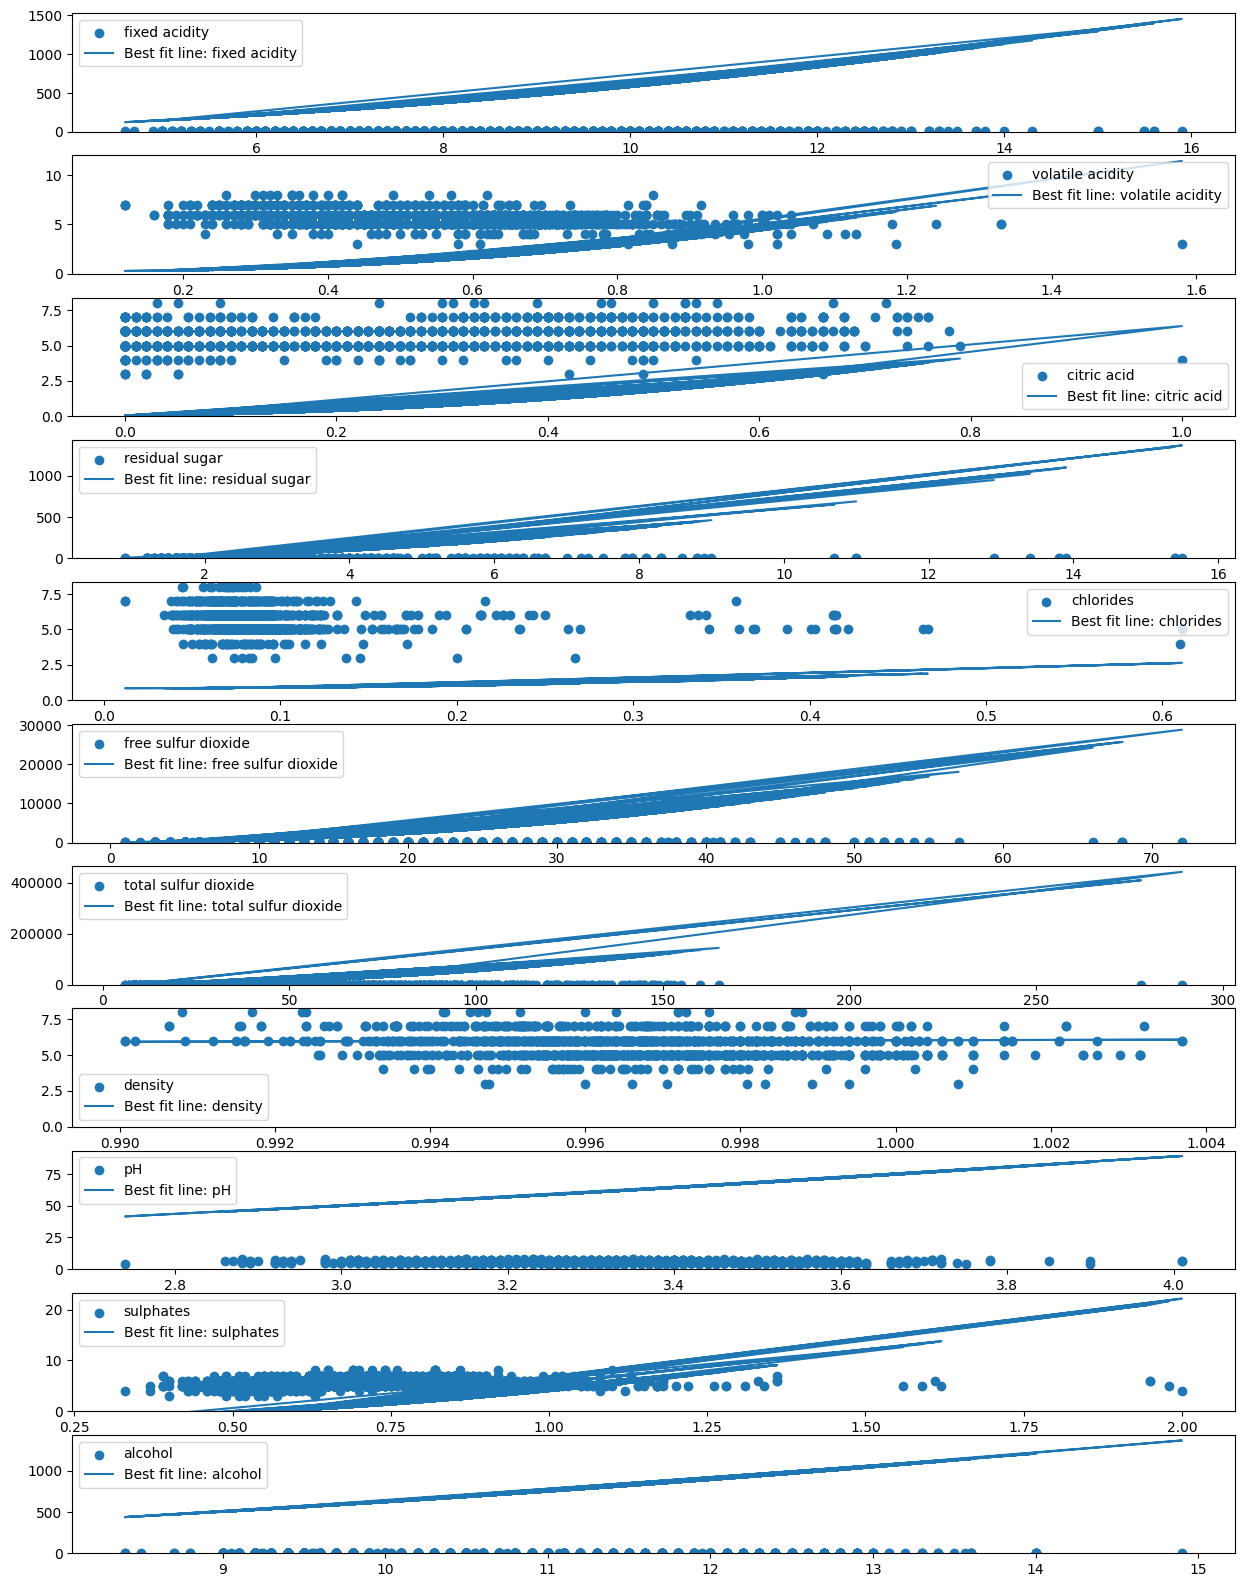

In [28]:
fig, ax = plt.subplots(11, figsize=(15,20))

for i,value in enumerate(interested_cols):
    ax[i].scatter(dataset[value], dataset["quality"], label=value)
    a, b, c = np.polynomial.Polynomial.fit(dataset[value], dataset["quality"],2)
    ax[i].plot(dataset[value], a*dataset[value]**2 + b*dataset[value] + c, label='Best fit line: {}'.format(value))
    ax[i].legend()
    ax[i].set_ylim(0,)

### 1.1 Linear Regression

In [29]:
import sklearn
from sklearn.linear_model import LinearRegression

#### 1.2 Create train and test datasets

In [30]:
x = dataset[interested_cols]
y = dataset["quality"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

dataset.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


#### 1.3 Train linear regression model

In [31]:
reg = LinearRegression()
reg.fit(x_train, y_train)
            
print(f'Coefficients: {reg.coef_}\nIntercept: {reg.intercept_}\nScore: {reg.score(x_train, y_train)}')


Coefficients: [ 4.03900514e-02 -1.09221215e+00 -1.87444945e-01  3.14748405e-02
 -1.80888760e+00  1.97840631e-03 -2.80479597e-03 -3.53316821e+01
 -2.70480710e-01  9.77325328e-01  2.69981564e-01]
Intercept: 38.76175661311703
Score: 0.3741067618779589


#### 1.4 Predict using linear model

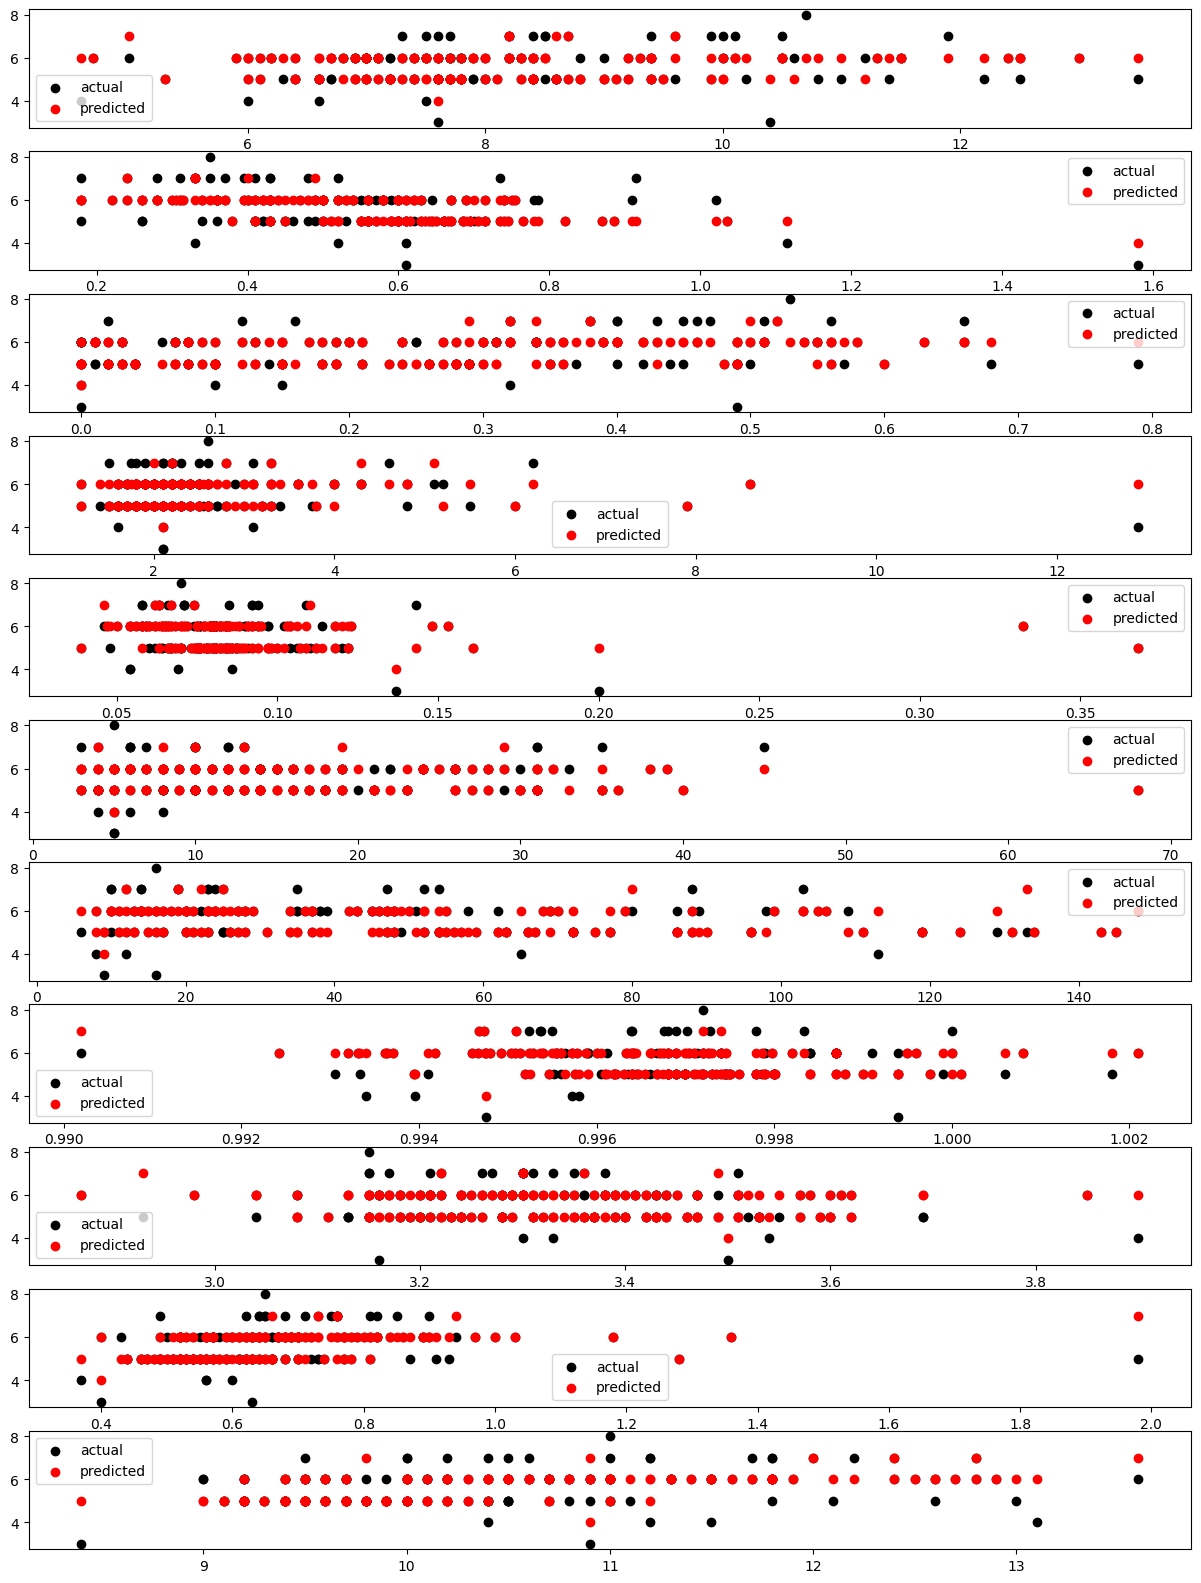

In [33]:
predicted = reg.predict(x_test)

fig2, ax2 = plt.subplots(11, figsize=(15,20))

for i,value in enumerate(interested_cols):
    ax2[i].scatter(x_test[value], y_test, label="actual", color='k')
    ax2[i].scatter(x_test[value], np.around(predicted), label="predicted", color='r')
    ax2[i].legend()



0.575

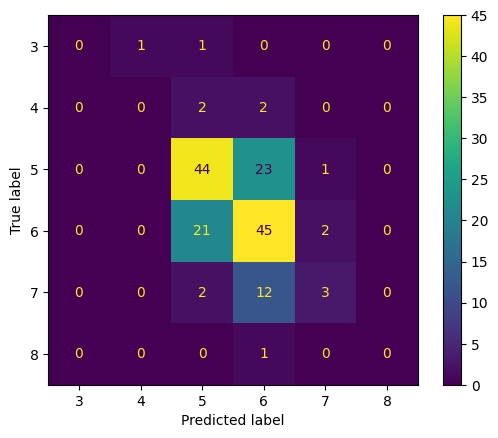

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, np.around(predicted))
dp = ConfusionMatrixDisplay.from_predictions(y_test, np.around(predicted))

sum([cm[i][i] for i in range(len(cm))])/160

#### 1.5 Generate combinations of columns to investigate impact of each parameter on winequality

##### 1.5.1 Check number of combinations for this dataset

In [36]:
## 11 columns
## when all 11 are in the list, no combinations possible
## dropping 1 column increases combination by 10 since 1 of each of the 10 columns can be swapped out once
## examples: 
## [1,2,3,4,5,6,7,8,9,10,11] -> [1,2,3,4,5,6,7,8,9,10] + [11]
## [1,2,3,4,5,6,7,8,9,10,11] -> [1,2,3,4,5,6,7,8,9,11] + [10]
## swapping out the dropped column with any columns between 1-11 to make new combination

def factorial(n):
    if n == 0:
        return 1
    else:
        return n*factorial(n-1)

# print(factorial(0))

def number_combinations(n, p):
    return factorial(n) / (factorial(p) * factorial(n-p))

# print(number_combinations(10,10))

def total_combinations(features):
    n = []
    for i,value in enumerate(features,1):
        n.append(number_combinations(len(features),i))
    return sum(n)

total_combinations(interested_cols)


2047.0

##### 1.5.2 Generate combinations using itertools.combinations

In [37]:
column_combinations = []

for i in range(1,len(interested_cols)+1):
    column_combinations += list(combinations(interested_cols, i))


##### 1.5.3 Generate linear model prediction for each combination and return combinations that gives score > 35%

In [38]:
def linear_train(col_comb: list): # input must be list of combinations for columns of interest in dataset
    ## Generate linear model
    lin_reg = LinearRegression()
    dict = {}
    
    ## Create training and testing datasets
    x = dataset[col_comb]
    y = dataset["quality"]
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

    ## Train linear model
    lin_reg.fit(x_train, y_train)

    ## Predict using linear model
    pred = lin_reg.predict(x_test)

    ## Return coefficients and score in dictionary
    coef_keys = list(range(len(lin_reg.coef_)))
    dict['Coefficients'] = {e: lin_reg.coef_[i] for i, e in enumerate(coef_keys)}
    dict['Intercept'] = lin_reg.intercept_
    dict['Score'] = lin_reg.score(x_test, y_test)
    dict['Columns'] = col_comb

    return dict # returns dictionary with coefficients, intercepts and score of linear model

In [39]:
good_combinations = [linear_train(list(column_combinations[i])) for i in range(len(column_combinations)) if linear_train(list(column_combinations[i]))['Score'] > 0.35]

In [40]:
max(good_combinations[i]['Score'] for i in range(len(good_combinations)))

0.5101426215752671

In [41]:
## Plot number of columns against score of regression model
df_from_goodcomb = pd.DataFrame(data=good_combinations)

## Convert columns into number of columns
df_from_goodcomb['columns_length'] = [len(i) for i in df_from_goodcomb.Columns]
df_from_goodcomb.columns_length.sum()

1620

Text(0, 0.5, 'Linear-model Score')

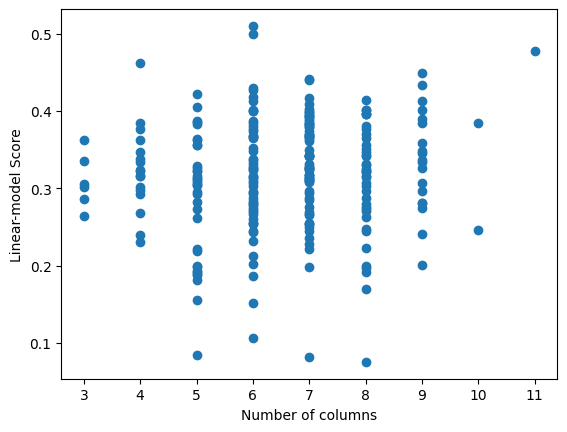

In [42]:
## Plot columns length against core

plt.scatter(df_from_goodcomb.columns_length, df_from_goodcomb.Score)
plt.xlabel('Number of columns')
plt.ylabel('Linear-model Score')

Text(0, 0.5, 'Count of Column Names')

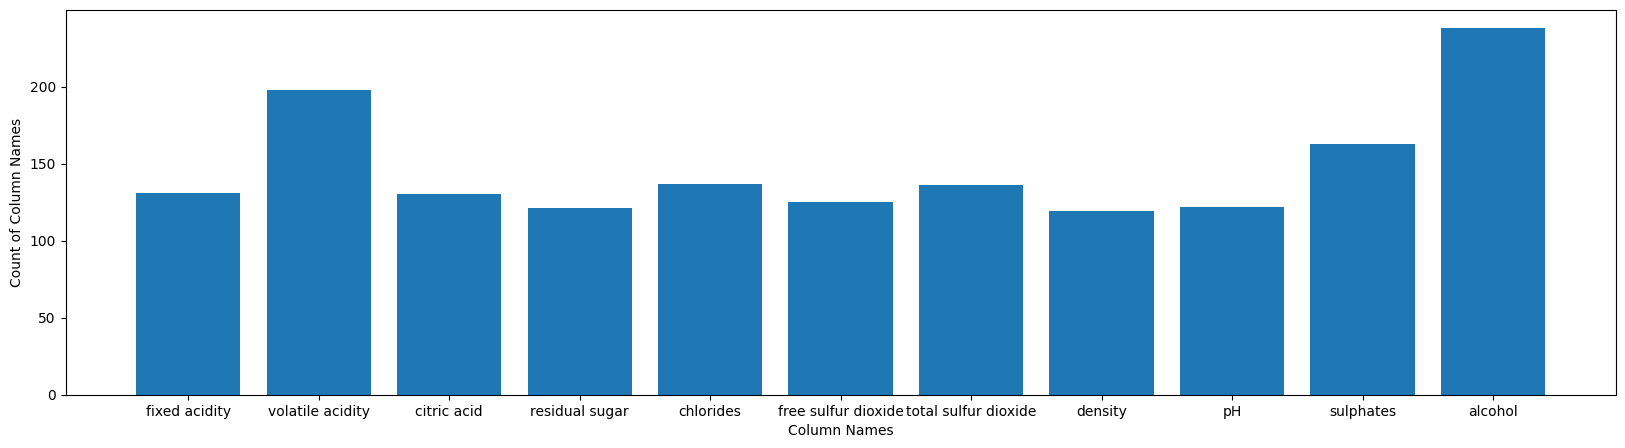

In [43]:
## Find number of times each column came up in 'Columns' to see which columns are most frequently occuring, which may indicate the impact/importance of the columns

col_count = {} # dictionary containing frequency of column appearance in score > 0.35 linear models

for names in interested_cols:
    sum_names = []
    for i in df_from_goodcomb.Columns:
        if names in i:
            sum_names += i
    col_count[names] = sum_names.count(names)


fig3, ax3 = plt.subplots(1,1, figsize=(20,5))

ax3.bar(col_count.keys(), col_count.values())
ax3.set_xlabel('Column Names')
ax3.set_ylabel('Count of Column Names')


### 2.1 Generalize Model

#### 2.1.1 Function to save model via looping

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors

def train_model(algorithm: str, num: int, data: pd.DataFrame, train_test_split):
    global best_arrays

    ## Define global variable to be accessed outside of function
    # global best_arrays


    ## Generate all column combinations using itertools
    column_combinations = []
    col_of_interest = list(data.columns.drop("quality"))
    print(col_of_interest)

    for i in range(1,len(col_of_interest)+1):
        column_combinations += list(combinations(col_of_interest, i))

    print(len(column_combinations))
    

    ## Split data into train and test sets for each column combination
    
    for j,value in enumerate(column_combinations[:]):
        for i in range(num):
            ## Load in previous model if available
            try: #### (!)issue here is that everytime it loads the saved pickle, the best is error because the training and test sets have different number of columns
                pickle_in = open(f"{algorithm.split('(')[0]}_model.pickle", "rb")
                model = pickle.load(pickle_in)
                best_arr = pd.read_csv(f"{algorithm.split('(')[0]}_best_array.csv")
                best = model.score(best_arr.iloc[-round(len(best_arr.index)*train_test_split):,:-1], best_arr.iloc[-round(len(best_arr.index)*train_test_split):,-1:])

            except:
                best = 0
    
        
            x = data[list(column_combinations[j])]
            y = data.iloc[:, -1]
            x_tr, x_te, y_tr, y_te = sklearn.model_selection.train_test_split(x,y,test_size=train_test_split)


            ## Loop to try for best score on model
            model = eval(algorithm)
            model.fit(x_tr, y_tr)
            acc = model.score(x_te, y_te)

            if acc > best:

                best_arrays = [x_tr,x_te,y_tr,y_te]
                best = acc
                with open(f"{algorithm.split('(')[0]}_model.pickle", "wb") as f:
                    pickle.dump(model, f)
                print(best)
            
                df1 = pd.DataFrame(best_arrays[0])
                df1['quality'] = best_arrays[2]
                df2 = pd.DataFrame(best_arrays[1])
                df2['quality'] = best_arrays[3]

                pd.concat([df1,df2], axis=0).to_csv(f"{algorithm.split('(')[0]}_best_array.csv", index=False)

    return f'Training completed for {num*len(column_combinations)} times'

In [45]:
train_model('LinearRegression()',1, dataset, 0.1)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
2047


'Training completed for 2047 times'

#### 2.1.2 Load in model

In [46]:
# DecisionTreeClassifier

pickle_dtree = open("DecisionTreeClassifier_model.pickle", "rb")
dtree = pickle.load(pickle_dtree)

df_dtree = pd.read_csv('DecisionTreeClassifier_best_array.csv')
best_x_dtree = df_dtree.iloc[-160:,:-1]
best_y_dtree = df_dtree.iloc[-160:,-1:]
dtree_predictions = dtree.predict(best_x_dtree)
dtree.score(best_x_dtree, best_y_dtree)

0.7625

In [47]:
# RandomForestClassifier

pickle_rforest = open("RandomForestClassifier_model.pickle", "rb")
rforest = pickle.load(pickle_rforest)

df_rforest = pd.read_csv('RandomForestClassifier_best_array.csv')
best_x_rforest = df_rforest.iloc[-160:,:-1]
best_y_rforest = df_rforest.iloc[-160:,-1:]
rforest_predictions = rforest.predict(best_x_rforest)
rforest.score(best_x_rforest, best_y_rforest)

0.83125

#### 2.1.3 Evaluation of the Model - Confusion Matrix

0.7625

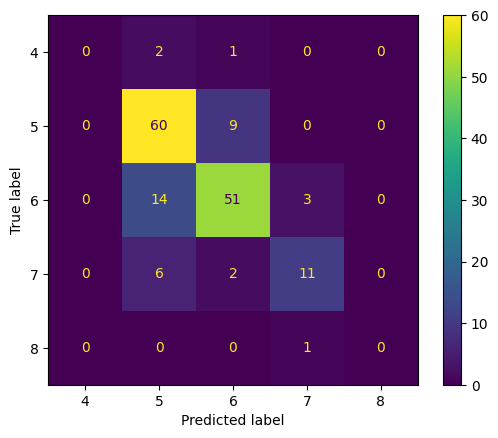

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# DecisionTreeClassifier Evaluation
dtree_cm = confusion_matrix(best_y_dtree, dtree_predictions)
dtree_dp = ConfusionMatrixDisplay.from_predictions(best_y_dtree, dtree_predictions)

acc_dtree = sum([dtree_cm[i][i] for i in range(len(dtree_cm))])/sum(sum(dtree_cm))
acc_dtree

0.83125

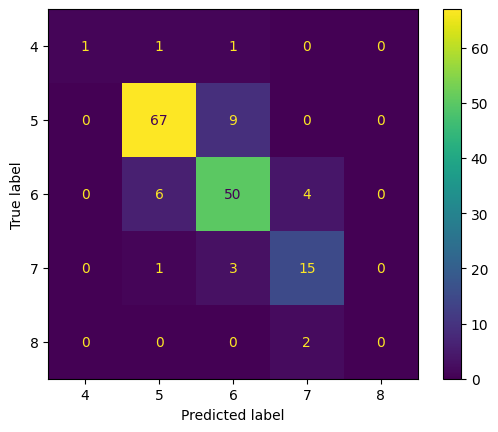

In [49]:
# RandomForestClassifier Evaluation
rforest_cm = confusion_matrix(best_y_rforest, rforest_predictions)
rforest_dp = ConfusionMatrixDisplay.from_predictions(best_y_rforest, rforest_predictions)

acc_rforest = sum([rforest_cm[i][i] for i in range(len(rforest_cm))])/sum(sum(rforest_cm))
acc_rforest

#### 2.1.4 Evaluation of the Model - Cross-validation

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
# DecisionTreeClassifier Score
scr_dtree = cross_val_score(dtree, df_dtree.iloc[:,:-1], df_dtree.iloc[:,-1:], cv=10)
print(f'Mean: {scr_dtree.mean()}\nStd: {scr_dtree.std()}')

Mean: 0.6248191823899371
Std: 0.04356992854380154


In [52]:
# RandomForestClassifier Score
scr_rforest = cross_val_score(rforest, df_rforest.iloc[:,:-1], df_rforest.iloc[:,-1:], cv=10)
print(f'Mean: {scr_rforest.mean()}\nStd: {scr_rforest.std()}')

c:\Users\lianz\anaconda3\envs\DataScience\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\lianz\anaconda3\envs\DataScience\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\lianz\anaconda3\envs\DataScience\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\lianz\anaconda3\envs\DataScience\lib\site-packages\sklearn\model_selec

Mean: 0.6961124213836478
Std: 0.041195806656760856


In [53]:
print(df_dtree.columns)
print(df_rforest.columns)

Index(['citric acid', 'chlorides', 'free sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['volatile acidity', 'chlorides', 'free sulfur dioxide', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')


#### 2.1.4 Visualizing the tree 

[Text(0.5002019883873795, 0.9736842105263158, 'X[8] <= 10.25\ngini = 0.647\nsamples = 1439\nvalue = [10, 50, 606, 572, 184, 17]'),
 Text(0.23927065074496057, 0.9210526315789473, 'X[1] <= 0.548\ngini = 0.524\nsamples = 749\nvalue = [7, 28, 463, 226, 23, 2]'),
 Text(0.1250985977212971, 0.868421052631579, 'X[5] <= 60.5\ngini = 0.572\nsamples = 331\nvalue = [1, 7, 166, 138, 17, 2]'),
 Text(0.05598159509202454, 0.8157894736842105, 'X[7] <= 0.585\ngini = 0.592\nsamples = 233\nvalue = [1, 6, 93, 115, 16, 2]'),
 Text(0.024539877300613498, 0.7631578947368421, 'X[8] <= 9.65\ngini = 0.523\nsamples = 71\nvalue = [0, 5, 43, 23, 0, 0]'),
 Text(0.012620508326029798, 0.7105263157894737, 'X[4] <= 8.5\ngini = 0.427\nsamples = 47\nvalue = [0, 3, 34, 10, 0, 0]'),
 Text(0.0098159509202454, 0.6578947368421053, 'gini = 0.0\nsamples = 17\nvalue = [0, 0, 17, 0, 0, 0]'),
 Text(0.015425065731814198, 0.6578947368421053, 'X[3] <= 0.082\ngini = 0.558\nsamples = 30\nvalue = [0, 3, 17, 10, 0, 0]'),
 Text(0.0084136722

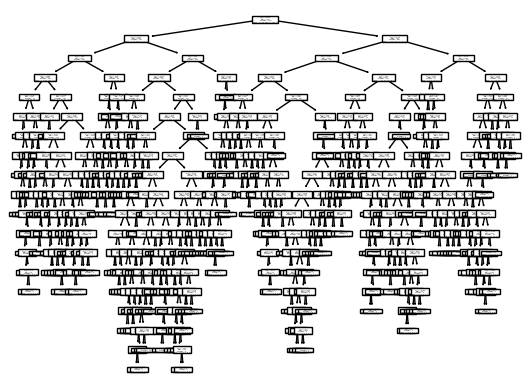

In [ ]:
from sklearn import tree

tree.plot_tree(dtree)